# Mounting drive for file access



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Dependencies

In [4]:
!pip install python-dateutil


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install -U -q PyDrive


# Libraries

In [7]:
#%%
#LIBRARIES
#Custom Library Connection
import sys
import os
import import_ipynb
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Data Processing
import pandas as pd
import numpy as np

import datetime

#Table Formatter
from google.colab.data_table import DataTable
DataTable.max_columns = 50

#Plots
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

#LSTM
from statsmodels.tsa.seasonal import seasonal_decompose #seasonality
from statsmodels.graphics.tsaplots import plot_acf #acf


import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator


np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Custom Libraries

In [8]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [9]:
module_models = drive.CreateFile({'id':'1derReHVn0P30RFlGd1TJ_IYd0RzidwCN'})
module_models.GetContentFile('models.ipynb')
module_models

GoogleDriveFile({'id': '1derReHVn0P30RFlGd1TJ_IYd0RzidwCN', 'kind': 'drive#file', 'etag': '"MTY0Nzk2NTMxMDU2OQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1derReHVn0P30RFlGd1TJ_IYd0RzidwCN', 'webContentLink': 'https://drive.google.com/uc?id=1derReHVn0P30RFlGd1TJ_IYd0RzidwCN&export=download', 'alternateLink': 'https://colab.research.google.com/drive/1derReHVn0P30RFlGd1TJ_IYd0RzidwCN', 'embedLink': 'https://drive.google.com/file/d/1derReHVn0P30RFlGd1TJ_IYd0RzidwCN/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google.colaboratory', 'thumbnailLink': 'https://lh6.googleusercontent.com/cpjeHSt3wTUAh59tknWameBNdL2zpGXoQ1v9q1HwvCXO8UHW81mjGVIMbtm8ixsi-j2aXVZ37DFB1cM=s220', 'title': 'models.ipynb', 'mimeType': 'application/vnd.google.colaboratory', 'description': 'Colaboratory notebook', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': F

In [10]:
from models import*

importing Jupyter notebook from models.ipynb
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
split_value(pd.DataFrame(np.random.randint(0,100,size=(10, 3)), columns=list('ABC')) ,2)

(    A   B   C
 0  37  12  72
 1   9  75   5
 2  79  64  16
 3   1  76  71
 4   6  25  50
 5  20  18  84
 6  11  28  29
 7  14  50  68,     A   B   C
 8  87  87  94
 9  96  86  13)

In [12]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [13]:
module_helper = drive.CreateFile({'id':'18rMYExGP6aHMSVHValrZjXfb_7ll-T4v'})
module_helper.GetContentFile('helperFunctions.ipynb')
module_helper

GoogleDriveFile({'id': '18rMYExGP6aHMSVHValrZjXfb_7ll-T4v', 'kind': 'drive#file', 'etag': '"MTY0ODc5OTM2NjYzNg"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/18rMYExGP6aHMSVHValrZjXfb_7ll-T4v', 'webContentLink': 'https://drive.google.com/uc?id=18rMYExGP6aHMSVHValrZjXfb_7ll-T4v&export=download', 'alternateLink': 'https://colab.research.google.com/drive/18rMYExGP6aHMSVHValrZjXfb_7ll-T4v', 'embedLink': 'https://drive.google.com/file/d/18rMYExGP6aHMSVHValrZjXfb_7ll-T4v/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google.colaboratory', 'title': 'helperFunctions.ipynb', 'mimeType': 'application/vnd.google.colaboratory', 'description': 'Colaboratory notebook', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2022-03-09T08:17:39.034Z', 'modifiedDate': '2022-04-01T07:49:26.636Z', 'modifiedByMeDate': '2022-04-01T07:49

In [14]:
from helperFunctions import*

importing Jupyter notebook from helperFunctions.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
uniqueValues([1,1,1,12,2,2,3])

{1: 3, 2: 2, 3: 1, 12: 1}

# General Information about Data

In [16]:

#%%
#Reading Data from CSV 
path="/content/gdrive/My Drive/Thesis-Project/data/formatted_whole.csv"
df = pd.read_csv(path)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,21,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,...,Errore,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag
0,105041,2872635,748994,748994,NaN,NaN,NaN,NaN,Set User ID,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
1,105042,2872636,748994,Home,53.0,Load Agenda from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:24 +0000,Load Agenda from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
2,105044,2872637,748994,Home,7.0,Load HomePage KPI from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load HomePage KPI from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
3,105045,2872638,748994,Contacts,4.0,Load contacts GDP from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load contacts GDP from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
4,105046,2872639,748994,Home,968.0,Load Tasks from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:25 +0000,Load Tasks from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474937,1470945,4347572,672590,Home,5668.0,Load Tasks from service,2022-02-28 23:59:35 +0000,2022-02-28 23:59:41 +0000,Load Tasks from service,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474938,1470943,4347573,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,NaN,NaN,NaN,401.0,Http failure response for https://apigateway.g...,NaN,2022-02-28,23,Monday,-2
1474939,1470946,4347574,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,NaN,NaN,SafeClockPianoAzioneService-pdaRequest,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474940,1470948,4347575,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,Forbidden,/kpi/detail/5,DashboardDetailService-createLogFn,403.0,No message available,java.lang.reflect.UndeclaredThrowableException,2022-02-28,23,Monday,-2


## Date Range

In [ ]:
start_date = min(df["Timestamp"]) #these dates are kept as params to not calculating again in the rest of the application
end_date = max(df["Timestamp"])
print("Starting Time: {}\nEnding Time: {}".format(start_date, end_date))

## Columns

In [ ]:
print("Shape of dataframe:",df.shape)
df.dtypes

# Formatting Dataframe

In [17]:
#Formatting DF
#Convert dataframe "Timestamp" column from string to datetime type of object, therefore we can simplify problem as a timeseries prediction, 
#also timestamp is a unique value in our table that we can analyze data based on it

#df['Timestamp'] = [parser.parse(df["Timestamp"].iloc[i]) for i in range(len(df)) ]
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp') #Can be changed to Session ID

df = df.drop('Unnamed: 0',axis=1)
df = df.reset_index(drop=True)


In [ ]:
df

## Resample Hourly

In [18]:
df_h = df.set_index('Timestamp').resample('60min').mean()
df_h = df_h.reset_index()

In [ ]:
df_h

In [ ]:
df_h["filled"], df_h["filled_tag"] = fill_missing_previous(df_h)

In [ ]:
df_h[["Timestamp","Memoria Usata","filled", "filled_tag"]]

,Timestamp,Memoria Usata,filled,filled_tag
0,2022-02-01 00:00:00,66.974122,66.974122,current
1,2022-02-01 01:00:00,55.682537,55.682537,current
2,2022-02-01 02:00:00,68.725000,68.725000,current
3,2022-02-01 03:00:00,64.380769,64.380769,next
4,2022-02-01 04:00:00,73.976471,73.976471,current
...,...,...,...,...
667,2022-02-28 19:00:00,67.097551,67.097551,current
668,2022-02-28 20:00:00,61.370595,61.370595,current
669,2022-02-28 21:00:00,69.099310,69.099310,current
670,2022-02-28 22:00:00,73.652603,73.652603,current


In [ ]:
df_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0,66.974122,current
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0,55.682537,current
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0,68.725000,current
3,2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,64.380769,NaN,NaN,NaN,NaN,64.380769,next
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0,73.976471,current
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0,67.097551,current
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0,61.370595,current
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0,69.099310,current
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0,73.652603,current


# Plots

In [ ]:
#plot("Timestamp","Memory Usage[mb]",df["Timestamp"],df["Memoria Usata"],"o",1 ,20 ,20)

In [ ]:
#plot("Timestamp","Memory Usage[mb]",df["Timestamp"],df["Memoria Usata"],1,1 ,20 ,20)

In [ ]:
# df["date"] = [df["Timestamp"].iloc[i].date() for i in range(len(df))]
# date_dct = uniqueValues(df.date)
# grouped_date = df.groupby(df.date)

# dates=[grouped_date.get_group(x) for x in grouped_date.groups]

In [ ]:
# for i in dates:
#   print(len(i),end=", ")
# print("\nMinimum number of samples tracked a day: ", min([len(i) for i in dates]))

In [ ]:
# avg_mem_per_day = sum([len(i) for i in dates])/len(dates)
# print("Average samples per day:",avg_mem_per_day)

In [ ]:
#Undo comment below for daily memory usage plots
# for i in dates:
#     plot("Timestamp_{}".format(str(min(i.date))),"Memory Usage",i["Timestamp"],i["Memoria Usata"],"o",1 ,20 ,20)
#     plot("Timestamp_{}".format(str(min(i.date))),"Memory Usage",i["Timestamp"],i["Memoria Usata"],1,1 ,20 ,20)
  

# LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [ ]:
df_lstm = pd.concat([df_h['Timestamp'], df_h['Memoria Usata']], axis=1, keys=['Timestamp', 'Memoria Usata'])
df_lstm =df_lstm.set_index('Timestamp')
df_lstm

,Memoria Usata
Timestamp,
2022-02-01 00:00:00,66.974122
2022-02-01 01:00:00,55.682537
2022-02-01 02:00:00,68.725000
2022-02-01 03:00:00,64.380769
2022-02-01 04:00:00,73.976471
...,...
2022-02-28 19:00:00,67.097551
2022-02-28 20:00:00,61.370595
2022-02-28 21:00:00,69.099310


## Seasonality

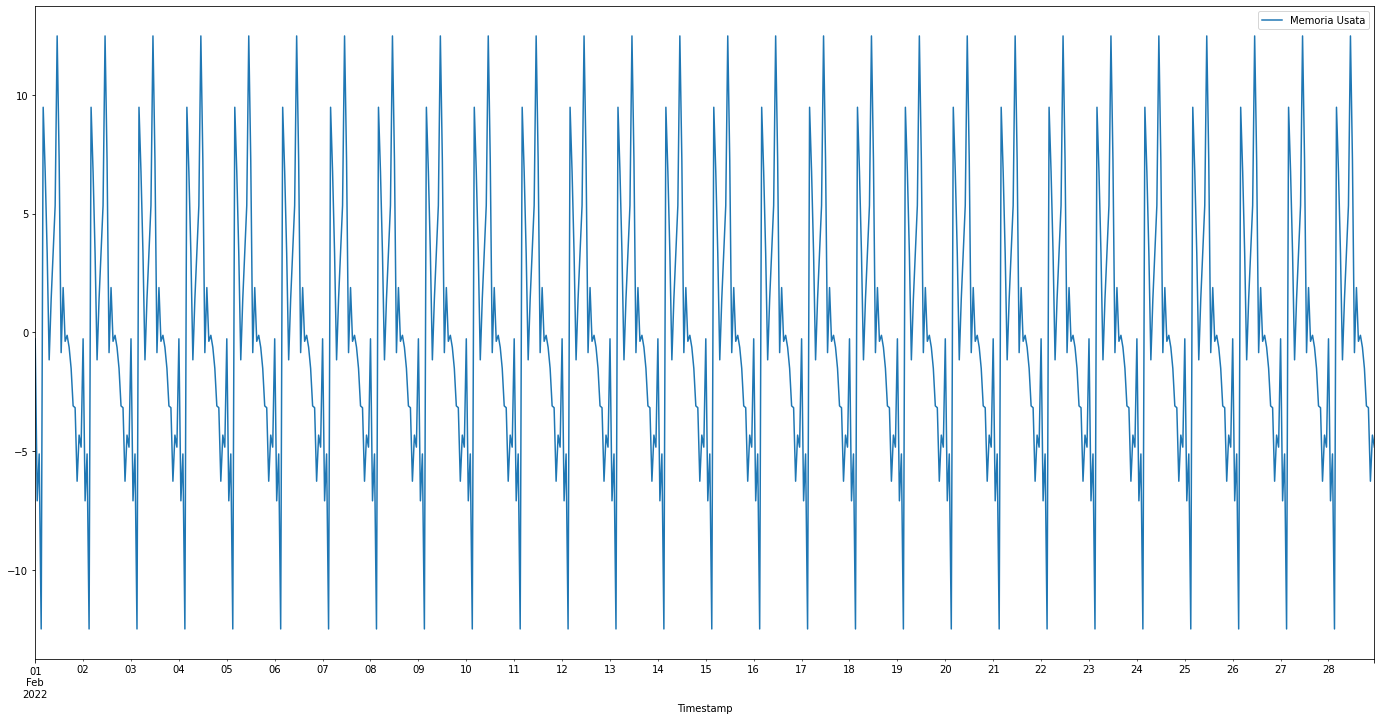

In [ ]:
seasonality = seasonal_decompose(df_lstm)
seasonality.seasonal[:1000].plot(figsize = (24,12));

## ACF

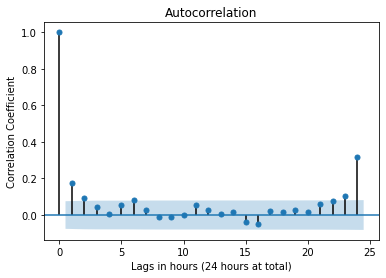

In [ ]:
plot_acf(df_lstm, lags = 24)
plt.xlabel("Lags in hours (24 hours at total)")
plt.ylabel("Correlation Coefficient")
plt.show()

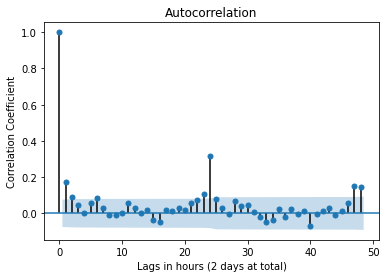

In [ ]:
plot_acf(df_lstm, lags = 48)
plt.xlabel("Lags in hours (2 days at total)")
plt.ylabel("Correlation Coefficient")
plt.show()

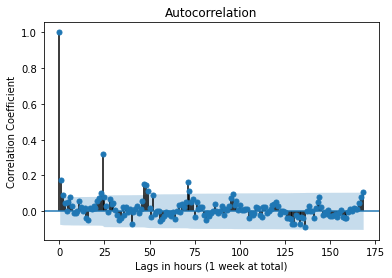

In [ ]:
plot_acf(df_lstm, lags = 168)
plt.xlabel("Lags in hours (1 week at total)")
plt.ylabel("Correlation Coefficient")
plt.show()

In [ ]:
# train_percentage = 0.8
# train, test = df_lstm[:int(len(df_lstm)*train_percentage)], df_lstm[int(len(df_lstm)*(train_percentage)):]

In [ ]:
train = df_lstm[:-48]
test = df_lstm[-48:] # last 48 hours is my test data

In [ ]:
train.shape,test.shape


((624, 1), (48, 1))

In [ ]:
train.head()

,Memoria Usata
Timestamp,
2022-02-01 00:00:00,66.974122
2022-02-01 01:00:00,55.682537
2022-02-01 02:00:00,68.725000
2022-02-01 03:00:00,64.380769
2022-02-01 04:00:00,73.976471


## Standartization of Features

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
train

,Memoria Usata
Timestamp,
2022-02-01 00:00:00,66.974122
2022-02-01 01:00:00,55.682537
2022-02-01 02:00:00,68.725000
2022-02-01 03:00:00,64.380769
2022-02-01 04:00:00,73.976471
...,...
2022-02-26 19:00:00,46.590682
2022-02-26 20:00:00,74.705311
2022-02-26 21:00:00,47.356000


## Time Series Generator

In [ ]:
#Time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
#define generator 
#I have used batch_size as 10 so that it's faster, one can use 1 as well
n_input = 48
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input, batch_size = 10)
#Note: both the parameters of TimeseriesGenerator are scaled_train #because to generate the data and the label it will use scaled_train

In [ ]:
train

,Memoria Usata
Timestamp,
2022-02-01 00:00:00,66.974122
2022-02-01 01:00:00,55.682537
2022-02-01 02:00:00,68.725000
2022-02-01 03:00:00,64.380769
2022-02-01 04:00:00,73.976471
...,...
2022-02-26 19:00:00,46.590682
2022-02-26 20:00:00,74.705311
2022-02-26 21:00:00,47.356000


## Vanilla LSTM Model (n_input = 48, n_features = 1), epochs = 5

In [ ]:
model = Sequential()
model.add(LSTM(200,activation= "relu" , input_shape = (n_input , n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam" , loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator, epochs=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
58/58 [==============================] - 10s 117ms/step - loss: 0.9936
Epoch 2/5
58/58 [==============================] - 7s 128ms/step - loss: 0.9659
Epoch 3/5
58/58 [==============================] - 7s 119ms/step - loss: 0.9612
Epoch 4/5
58/58 [==============================] - 4s 64ms/step - loss: 0.9644
Epoch 5/5
58/58 [==============================] - 4s 64ms/step - loss: 0.9636


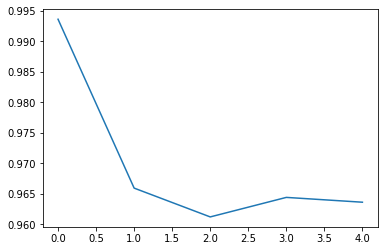

In [ ]:
loss_per_epoch = model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch);

### Test Data

In [ ]:
first_eval_batch = np.array(scaled_train[-48:])
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
test_predictions = []

first_eval_batch = np.array(scaled_train[-n_input:])
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    # 2d to 1d conversion
    current_pred = model.predict(current_batch)[0]
    #store the prediction
    test_predictions.append(current_pred)
    #update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

test_predictions = scaler.inverse_transform(test_predictions)
test["pred"] = test_predictions

In [ ]:
test

,Memoria Usata,pred
Timestamp,,
2022-02-27 00:00:00,53.880541,67.562193
2022-02-27 01:00:00,46.574000,68.307199
2022-02-27 02:00:00,61.547143,68.339022
2022-02-27 03:00:00,82.475769,68.215098
2022-02-27 04:00:00,50.257778,68.029660
2022-02-27 05:00:00,48.455714,67.814671
2022-02-27 06:00:00,85.034500,67.578568
2022-02-27 07:00:00,73.256301,67.321016
2022-02-27 08:00:00,70.488116,67.042915


In [ ]:
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x=test.index,
    y=test["Memoria Usata"]
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x=test.index,
    y=test["pred"]

))

fig.show()

## Vanilla LSTM Model (n_input=96, n_features = 1), epochs =5

### Train Test Split

In [ ]:
train,test = split_value(df_lstm,48)
n_input = 96
n_features = 1
train

,Memoria Usata
Timestamp,
2022-02-01 00:00:00,66.974122
2022-02-01 01:00:00,55.682537
2022-02-01 02:00:00,68.725000
2022-02-01 03:00:00,64.380769
2022-02-01 04:00:00,73.976471
...,...
2022-02-26 19:00:00,46.590682
2022-02-26 20:00:00,74.705311
2022-02-26 21:00:00,47.356000


### Standartize

In [ ]:
scaler, scaled_train, scaled_test=standartize(train,test)

In [ ]:
scaler, scaled_train

(StandardScaler(), array([[ 2.20712362e-02],
        [-6.95598063e-01],
        [ 1.33353376e-01],
        [-1.42756776e-01],
        [ 4.67125777e-01],
        [-5.20971051e-01],
        [-7.61358916e-01],
        [-3.56731769e-01],
        [-3.74828736e-01],
        [-3.41353209e-01],
        [-3.57392397e-01],
        [ 1.80925101e+00],
        [ 2.28034688e-01],
        [-1.62880242e-01],
        [-1.76544297e-01],
        [-2.34869982e-01],
        [-2.43058982e-01],
        [ 3.17262542e-02],
        [-1.20783182e-01],
        [-6.15092640e-01],
        [-5.16661054e-01],
        [-8.74049468e-01],
        [-1.96037486e-01],
        [-9.34627421e-01],
        [ 2.20712362e-02],
        [-1.61177909e+00],
        [ 1.33353376e-01],
        [-1.42756776e-01],
        [ 6.62668391e-01],
        [ 8.32195768e-01],
        [-2.12207463e-01],
        [-7.76597355e-01],
        [-1.52231967e-01],
        [ 9.03895506e-01],
        [ 2.58157871e+00],
        [ 4.82424427e+00],
        [ 

### Times Series Generation

In [ ]:
generator = generateTS(scaled_train, n_input, n_features)

In [ ]:
generator

### vanillaLSTM(units, activation, n_input, n_features, optimizer, loss, generator, epochs, scaler, scaled_train,test)
vanillaLSTM(50, "relu", 96, 1, "adam", "mse", generator, 5, scaled_train):


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               161600    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


models.ipynb:8: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



53/53 [==============================] - 8s 121ms/step - loss: 0.9913
Epoch 2/5
53/53 [==============================] - 6s 120ms/step - loss: 0.9837
Epoch 3/5
53/53 [==============================] - 6s 122ms/step - loss: 0.9735
Epoch 4/5
53/53 [==============================] - 6s 120ms/step - loss: 0.9662
Epoch 5/5
53/53 [==============================] - 9s 169ms/step - loss: 0.9600


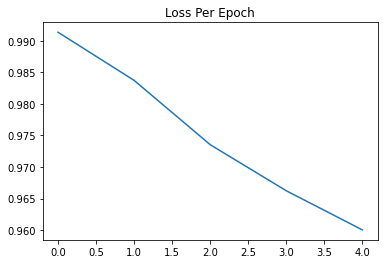

In [ ]:
test["pred"] = vanillaLSTM(200, "relu", 96, 1, "adam", "mse", generator, 5,scaler,  scaled_train,test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               161600    
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


models.ipynb:8: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



53/53 [==============================] - 8s 120ms/step - loss: 0.9842
Epoch 2/10
53/53 [==============================] - 6s 120ms/step - loss: 0.9806
Epoch 3/10
53/53 [==============================] - 6s 121ms/step - loss: 0.9670
Epoch 4/10
53/53 [==============================] - 6s 121ms/step - loss: 0.9661
Epoch 5/10
53/53 [==============================] - 6s 120ms/step - loss: 0.9562
Epoch 6/10
53/53 [==============================] - 6s 122ms/step - loss: 0.9499
Epoch 7/10
53/53 [==============================] - 7s 122ms/step - loss: 0.9512
Epoch 8/10
53/53 [==============================] - 6s 121ms/step - loss: 0.9519
Epoch 9/10
53/53 [==============================] - 6s 121ms/step - loss: 0.9248
Epoch 10/10
53/53 [==============================] - 6s 122ms/step - loss: 0.9237


array([[68.42163595],
       [71.64048366],
       [71.99569495],
       [71.26889133],
       [70.12242417],
       [68.89094186],
       [67.73062268],
       [66.70561181],
       [65.82695995],
       [65.07861885],
       [64.44772189],
       [63.91796171],
       [63.47135821],
       [63.07969999],
       [62.72643393],
       [62.42372073],
       [62.18258728],
       [62.00618929],
       [61.89045857],
       [61.82640068],
       [61.8059735 ],
       [61.82361166],
       [61.87264973],
       [61.94347808],
       [62.02678246],
       [62.11500279],
       [62.2026881 ],
       [62.28523287],
       [62.35933273],
       [62.42326168],
       [62.47628962],
       [62.51847378],
       [62.55053016],
       [62.57363429],
       [62.5892271 ],
       [62.59884331],
       [62.60398621],
       [62.60602265],
       [62.60624584],
       [62.60562596],
       [62.6048368 ],
       [62.60432335],
       [62.60433601],
       [62.60496809],
       [62.60620974],
       [62

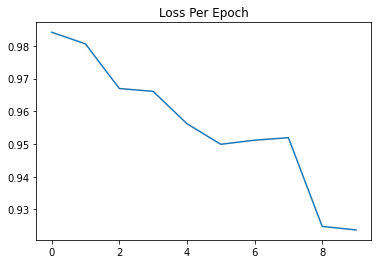

In [ ]:
vanillaLSTM(200, "relu", 96, 1, "adam", "mse", generator, 10,scaler,  scaled_train,test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 200)               161600    
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15


models.ipynb:8: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



53/53 [==============================] - 8s 122ms/step - loss: 0.9949
Epoch 2/15
53/53 [==============================] - 6s 120ms/step - loss: 0.9718
Epoch 3/15
53/53 [==============================] - 6s 122ms/step - loss: 0.9669
Epoch 4/15
53/53 [==============================] - 6s 122ms/step - loss: 0.9627
Epoch 5/15
53/53 [==============================] - 6s 121ms/step - loss: 0.9620
Epoch 6/15
53/53 [==============================] - 6s 120ms/step - loss: 0.9556
Epoch 7/15
53/53 [==============================] - 7s 135ms/step - loss: 0.9495
Epoch 8/15
53/53 [==============================] - 7s 123ms/step - loss: 0.9445
Epoch 9/15
53/53 [==============================] - 7s 124ms/step - loss: 0.9317
Epoch 10/15
53/53 [==============================] - 6s 121ms/step - loss: 0.9162
Epoch 11/15
53/53 [==============================] - 7s 123ms/step - loss: 0.8970
Epoch 12/15
53/53 [==============================] - 7s 122ms/step - loss: 0.8963
Epoch 13/15
53/53 [=================

array([[73.21498703],
       [77.79800145],
       [76.12130732],
       [72.24345208],
       [69.20223476],
       [67.28596687],
       [66.09792378],
       [65.2839861 ],
       [64.60916642],
       [63.96516217],
       [63.33347359],
       [62.7201087 ],
       [62.08335154],
       [61.50229342],
       [61.02246387],
       [60.66263344],
       [60.41082829],
       [60.2634843 ],
       [60.21069831],
       [60.23912539],
       [60.32754735],
       [60.455424  ],
       [60.60619705],
       [60.76436467],
       [60.91725903],
       [61.05680192],
       [61.17776979],
       [61.2772231 ],
       [61.35525938],
       [61.41409935],
       [61.45667457],
       [61.48622936],
       [61.50590818],
       [61.51853848],
       [61.52642445],
       [61.53134884],
       [61.53461192],
       [61.53709756],
       [61.53939048],
       [61.54180485],
       [61.54447899],
       [61.5474129 ],
       [61.55053108],
       [61.55372289],
       [61.5568664 ],
       [61

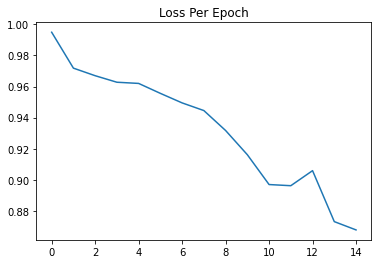

In [ ]:
vanillaLSTM(200, "relu", 96, 1, "adam", "mse", generator, 15,scaler,  scaled_train,test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 200)               161600    
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30


models.ipynb:8: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



53/53 [==============================] - 14s 234ms/step - loss: 0.9847
Epoch 2/30
53/53 [==============================] - 9s 172ms/step - loss: 0.9757
Epoch 3/30
53/53 [==============================] - 7s 123ms/step - loss: 0.9638
Epoch 4/30
53/53 [==============================] - 6s 122ms/step - loss: 0.9600
Epoch 5/30
53/53 [==============================] - 7s 123ms/step - loss: 0.9534
Epoch 6/30
53/53 [==============================] - 7s 124ms/step - loss: 0.9401
Epoch 7/30
53/53 [==============================] - 7s 125ms/step - loss: 0.9318
Epoch 8/30
53/53 [==============================] - 7s 123ms/step - loss: 0.9298
Epoch 9/30
53/53 [==============================] - 7s 124ms/step - loss: 0.9124
Epoch 10/30
53/53 [==============================] - 7s 123ms/step - loss: 0.9038
Epoch 11/30
53/53 [==============================] - 6s 122ms/step - loss: 0.9020
Epoch 12/30
53/53 [==============================] - 7s 124ms/step - loss: 0.8883
Epoch 13/30
53/53 [================

array([[70.98467296],
       [82.97091276],
       [82.1254506 ],
       [73.5758964 ],
       [69.68818534],
       [69.00027513],
       [68.48494279],
       [67.8933997 ],
       [67.19830102],
       [66.31131046],
       [65.26443236],
       [64.01170358],
       [62.56342867],
       [61.19738155],
       [60.05599962],
       [59.21151606],
       [58.65622308],
       [58.32761016],
       [58.20051283],
       [58.43954795],
       [59.11369171],
       [60.17927823],
       [61.64788091],
       [63.40456311],
       [65.19822456],
       [66.65353007],
       [67.42644012],
       [67.51901331],
       [67.40776827],
       [67.24653686],
       [66.97686555],
       [66.52972978],
       [65.86845031],
       [64.98165833],
       [63.92791084],
       [62.87539609],
       [61.87911024],
       [61.05277875],
       [60.40234447],
       [59.9304023 ],
       [59.70650047],
       [59.81005291],
       [60.24844057],
       [61.05204633],
       [62.21671292],
       [63

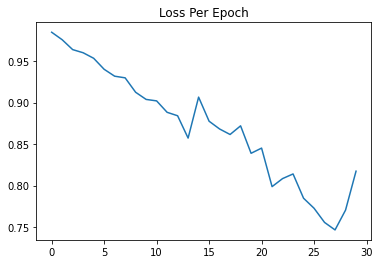

In [ ]:
vanillaLSTM(200, "relu", 96, 1, "adam", "mse", generator, 30,scaler,  scaled_train,test)

## Week

### Train Test Split

In [ ]:
train,test = split_value(df_lstm,168)
n_input = 168
n_features = 1


### Standartize

In [ ]:
scaler, scaled_train, scaled_test=standartize(train,test)

### Times Series Generation

In [ ]:
generator = generateTS(scaled_train, n_input, n_features)

### vanillaLSTM(units, activation, n_input, n_features, optimizer, loss, generator, epochs, scaler, scaled_train,test)
vanillaLSTM(50, "relu", 168, 1, "adam", "mse", generator, 5, scaled_train):


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 200)               161600    
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


models.ipynb:8: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



34/34 [==============================] - 9s 205ms/step - loss: 0.5961
Epoch 2/5
34/34 [==============================] - 7s 204ms/step - loss: 0.5869
Epoch 3/5
34/34 [==============================] - 7s 203ms/step - loss: 0.5832
Epoch 4/5
34/34 [==============================] - 7s 204ms/step - loss: 0.5785
Epoch 5/5
34/34 [==============================] - 7s 205ms/step - loss: 0.5709


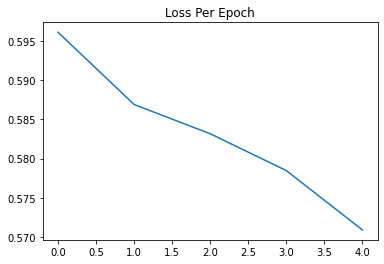

In [ ]:
pred_i168_e5 = vanillaLSTM(200, "relu", 168, 1, "adam", "mse", generator, 5,scaler,  scaled_train,test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 200)               161600    
                                                                 
 dense_6 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


models.ipynb:8: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



34/34 [==============================] - 8s 203ms/step - loss: 0.6014
Epoch 2/10
34/34 [==============================] - 7s 204ms/step - loss: 0.5850
Epoch 3/10
34/34 [==============================] - 7s 203ms/step - loss: 0.5804
Epoch 4/10
34/34 [==============================] - 7s 204ms/step - loss: 0.5785
Epoch 5/10
34/34 [==============================] - 7s 203ms/step - loss: 117051135167040741614374879232.0000
Epoch 6/10
34/34 [==============================] - 7s 203ms/step - loss: nan
Epoch 7/10
34/34 [==============================] - 7s 202ms/step - loss: nan
Epoch 8/10
34/34 [==============================] - 7s 202ms/step - loss: nan
Epoch 9/10
34/34 [==============================] - 7s 204ms/step - loss: nan
Epoch 10/10
34/34 [==============================] - 7s 203ms/step - loss: nan


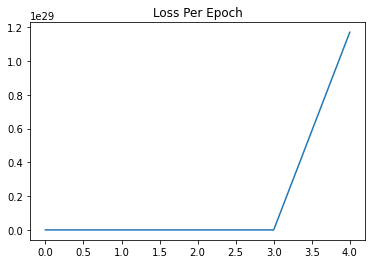

In [ ]:
pred_i168_e10 = vanillaLSTM(200, "relu", 168, 1, "adam", "mse", generator, 10,scaler,  scaled_train,test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 200)               161600    
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15


models.ipynb:8: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



34/34 [==============================] - 8s 205ms/step - loss: 0.5943
Epoch 2/15
34/34 [==============================] - 7s 203ms/step - loss: 0.5845
Epoch 3/15
34/34 [==============================] - 7s 203ms/step - loss: 0.5851
Epoch 4/15
34/34 [==============================] - 7s 202ms/step - loss: 0.5774
Epoch 5/15
34/34 [==============================] - 7s 203ms/step - loss: 0.5669
Epoch 6/15
34/34 [==============================] - 7s 203ms/step - loss: 0.5565
Epoch 7/15
34/34 [==============================] - 7s 202ms/step - loss: 0.5558
Epoch 8/15
34/34 [==============================] - 7s 203ms/step - loss: 0.5488
Epoch 9/15
34/34 [==============================] - 7s 203ms/step - loss: 0.5542
Epoch 10/15
34/34 [==============================] - 7s 204ms/step - loss: 0.5530
Epoch 11/15
34/34 [==============================] - 7s 202ms/step - loss: 0.5365
Epoch 12/15
34/34 [==============================] - 7s 204ms/step - loss: 0.5447
Epoch 13/15
34/34 [=================

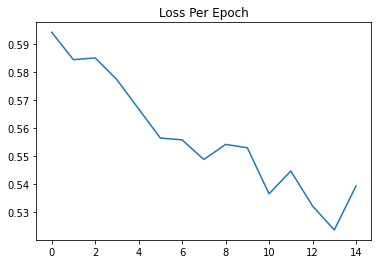

In [ ]:
pred_i168_e10 = vanillaLSTM(200, "relu", 168, 1, "adam", "mse", generator, 15,scaler,  scaled_train,test)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 200)               161600    
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25


models.ipynb:8: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



34/34 [==============================] - 9s 205ms/step - loss: 0.6046
Epoch 2/25
34/34 [==============================] - 7s 206ms/step - loss: 0.5900
Epoch 3/25
34/34 [==============================] - 7s 203ms/step - loss: 0.5832
Epoch 4/25
34/34 [==============================] - 7s 207ms/step - loss: 0.5777
Epoch 5/25
34/34 [==============================] - 7s 207ms/step - loss: 0.5659
Epoch 6/25
34/34 [==============================] - 7s 203ms/step - loss: 0.5662
Epoch 7/25
34/34 [==============================] - 7s 203ms/step - loss: 0.5606
Epoch 8/25
34/34 [==============================] - 7s 203ms/step - loss: 0.5480
Epoch 9/25
34/34 [==============================] - 7s 201ms/step - loss: 0.5395
Epoch 10/25
34/34 [==============================] - 7s 205ms/step - loss: 0.5377
Epoch 11/25
34/34 [==============================] - 7s 204ms/step - loss: 0.5212
Epoch 12/25
34/34 [==============================] - 7s 206ms/step - loss: 32.7108
Epoch 13/25
34/34 [================

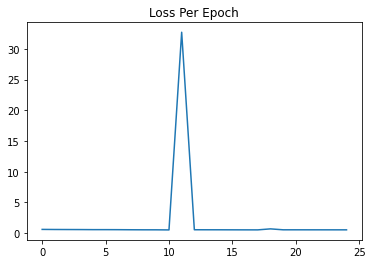

In [ ]:
pred_i168_e10 = vanillaLSTM(200, "relu", 168, 1, "adam", "mse", generator, 25,scaler,  scaled_train,test)

## Stacked LSTM Model(n_input = 48,n_features =1), epochs = 5

In [ ]:
model = Sequential()
model.add(LSTM(200,activation= "relu" ,return_sequences= True, input_shape = (n_input , n_features)))
model.add(LSTM(200,activation= "relu"))
model.add(Dense(1))
model.compile(optimizer = "adam" , loss="mse")
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 168, 200)          161600    
                                                                 
 lstm_10 (LSTM)              (None, 200)               320800    
                                                                 
 dense_9 (Dense)             (None, 1)                 201       
                                                                 
Total params: 482,601
Trainable params: 482,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



34/34 [==============================] - 21s 533ms/step - loss: 0.6005
Epoch 2/5
34/34 [==============================] - 18s 532ms/step - loss: 0.5897
Epoch 3/5
34/34 [==============================] - 18s 535ms/step - loss: 0.5814
Epoch 4/5
34/34 [==============================] - 18s 537ms/step - loss: 61332.7383
Epoch 5/5
34/34 [==============================] - 18s 536ms/step - loss: 0.5874


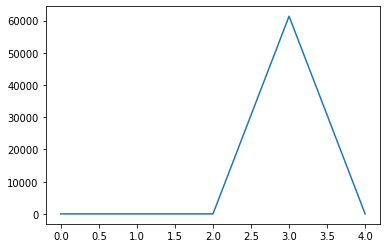

In [ ]:
loss_per_epoch = model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch);

In [ ]:
first_eval_batch = np.array(scaled_train[-48:])
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
test_predictions = []

first_eval_batch = np.array(scaled_train[-n_input:])
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    # 2d to 1d conversion
    current_pred = model.predict(current_batch)[0]
    #store the prediction
    test_predictions.append(current_pred)
    #update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

test_predictions = scaler.inverse_transform(test_predictions)
test["pred"] = test_predictions
test

ValueError: ignored

In [ ]:
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x=test.index,
    y=test["Memoria Usata"]
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x=test.index,
    y=test["pred"]

))

fig.show()

## LSTM parameters
LSTM expects input data to be a 3D tensor such that:
**[batch_size, timesteps, feature]**

**Batch_size**: how many samples in each batch during training and testing

**Timesteps**: means how many values exist in a sequence. For example in [4, 7, 8, 4] there are 4 timesteps

**Features**: how many dimensions are used to represent a data in one time step.

 For example, if each value in the sequence is one hot encoded with 9 zero and 1 one then feature is 10

**Dropout**: dropout is a regularization method where input and recurrent connections to LSTM units are probabilistically excluded from activation and weight updates while training a network. This has the effect of reducing overfitting and improving model performance.

**MAE Error Function**


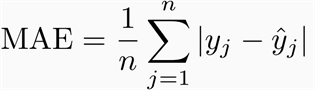

In [ ]:
model = Sequential()
model.add(LSTM(200,activation= "relu" , input_shape = (n_input , n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam" , loss="mse")
model.summary()

In [ ]:
model.fit_generator(generator , epochs=5)


In [ ]:
loss_per_epoch = model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch);

# Validation and Training Loss

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)
